In [4]:
import pandas as pd
import pickle
from scipy import stats
import numpy as np
import os 

In this section: we recommend to have a pictorial of the process. This will remind you of the complexity of the environment. What paramters matter and what parameters are observable in your data. 

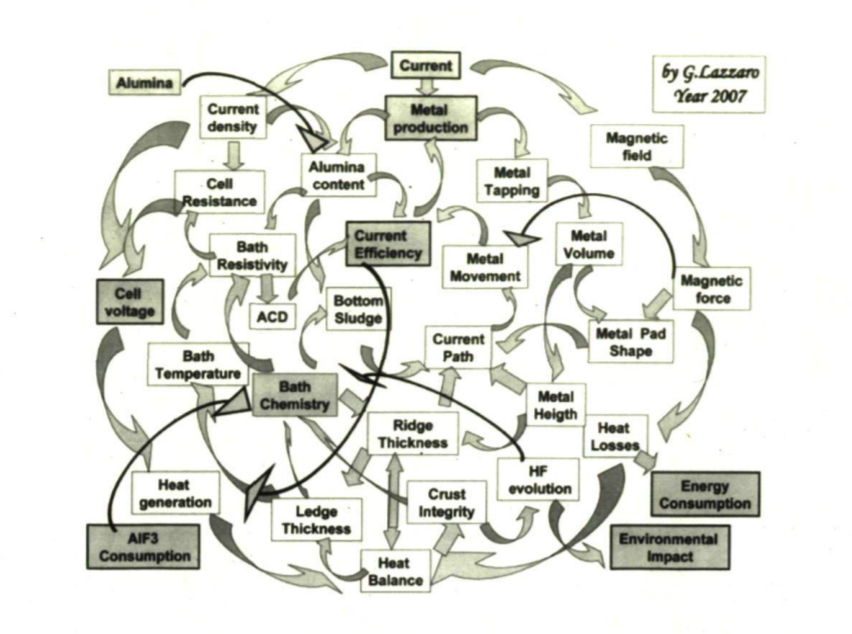



                                        SECTION A: Data Relevance 

(IMPORTAN) Data preprocessing: Make sure any unwanted values, such as nulls, were all replaced by empty values in the csv files such that pandas dataframe detects them as NAN.

Step1: Read data into pandas dataframe:

In [5]:
#pd.set_option('display.precision',20)  # useful line of code if your fata contains very small or large values to ensure precsion. 
logdf1 = pd.read_csv('plant_data/SampleData.csv')
#df = logdf1.sort_values(by='TRK_START_DTS')
df_main = logdf1.dropna()


In [6]:
df_main.head(5)

Unnamed: 0   BD     D     C     L          Z1          Z2          Z3  \
1           1  2.2  18.0  28.0  68.0  186.342862   90.000001   90.103572   
2           2  2.2  18.6  29.1  66.9  212.164287  152.067859  163.639290   
3           3  2.2  17.9  26.8  67.2  213.585721  145.650004  229.053575   
4           4  2.2  18.6  27.5  67.2  202.392859   99.896431  106.539288   
5           5  2.3  18.3  28.5  68.0  199.171429  100.025001  107.303573   

           Z4          Z5          WA          T           S           K  \
1  205.421431  171.257146  152.022646  68.975000  140.101208  143.114286   
2  250.378574  275.000003  151.062388  66.225000  137.209742  130.764286   
3  249.757146  274.992866  134.055721  61.521429  134.861553  115.250000   
4  155.692860  175.042860  127.055999  61.207143  137.516536  113.964286   
5  154.953573  175.021432  132.060861  61.357143  139.613706  119.185714   

           GBP          FPV    CU           A          SS  
1  1297.507629  2101.399902  63.0  271.808928  426.944333  
2  1238.679679  1949.266724  73.0  262.358928  407.027897  
3  1179.202602  1746.266724  70.0  246.085713  387.008817  
4  1215.918287  1695.400024  59.0  242.785714  397.016758  
5  1259.851981  1746.266724  59.0  245.335715  401.940533

Data preprocessing in pandas: You may or may not need to use some of the following pandas commands
    to normalize, filter, smoothen, group by, sort, or join datasets

In [ ]:
# in some cases you might have two different data sets and some might be high frequency data some useful code 
# pd.set_option('display.precision',20)
# logdf2 = pd.read_csv('plant_data/xxxx.csv')
# df_hf = logdf2.dropna()




In [ ]:
# use the following if you need to filter data by value. Some sensors have count values below which the data is not reliable
# df_hf_f = df_hf[df_hf.CNT >10]
# df3_f = df_hf[df_hf.CNT <=10]

In [ ]:
# useful if you need to normalize by a row in the data 
# df_hf_f["xxxxx"]=df_hf_f["xxxxx"]/df_hf_f["xx"]




In [ ]:
# useful code if you need grouping and sorting in your data 
# df = df.groupby(["xx"]).apply(lambda x: x.sort_values(["START_DTS"], ascending = True)).reset_index(drop=True)
# df_hf_f = df_hf_f.groupby(["xx"]).apply(lambda x: x.sort_values(["START_DTS"], ascending = True)).reset_index(drop=True)
#

In [ ]:
# perform moving average on the states of the high frequency data 
# window_len = 10
# df_hf_f[state_plus_action_high_freq] = df_hf_f[state_plus_action_high_freq].rolling(window = window_len).mean()
# df_hf_f= df_hf_f.dropna()

In [ ]:
#Useful when analyzing messages. You will need to convert messages to numerical values
# messages = df2["REASON_MSG"].unique()
# df2["REASON_MSG"].unique()
# msg ={}
# i = 1
# for count, message in enumerate(messages):
#     msg[message] = count
# msg
# for count, message in enumerate(messages):
#     df2.REASON_MSG[df2["REASON_MSG"]==message]=count

In [ ]:
#double check to see if messages are properly converted to numerical values. 
#df["REASON_MSG"].unique()
#df["REASON_MSG"]
      

In [ ]:
# useful commands for joining the dataframes 
# df["Time"]= df["START_DTS"]
# df_hf_f["Time"]= df_hf_f["START_DATE"]
#df_join = df2.merge(df_hf_f, on=["Time",'A_NUM'], how ="left")

Choose states and actions 

In [8]:
# # define states 
# states=logdf[['Torq','Pressure','Temperature']]
# actions=logdf[['InputSpeed','ZonalTemSetpoint]]


state_list = ['T','S','K','A','BD','D','C','L']
action_list = ['SS','CU','FPV','WA','Z4','Z5']


states = df_main[state_list]
actions = df_main[action_list]
#states.head(1000)


Choose the lag that best describes the cause and effect in terms of time interval in the data,
i.e lag = 1 means use the current lag in the data (sub second)

In [10]:
time_lag = 5
# identified different sampling rate
states = states
actions = actions
states_t = states.iloc[:-time_lag] #.astype(float)
states_tplus1 = states.iloc[time_lag:]#.astype(float)
actions_t = actions.iloc[:-time_lag]#.astype(float)
frames = [states_t, actions_t]
x_set_df = pd.concat(frames, axis=1)  
y_set_df = states_tplus1 
x_set = x_set_df.to_numpy()
y_set = y_set_df.to_numpy()

In [11]:
print(y_set[1:10,:])

[[ 62.79999978 142.7277113  121.714286   250.8500001    2.2
   18.          27.5         67.        ]
 [ 58.86785712 139.5559207  109.0071425  237.1928564    2.18
   18.2         26.7         66.5       ]
 [ 64.92142773 139.373939   125.3642853  257.5107149    2.17
   18.5         27.          66.9       ]
 [ 64.61428629 140.1300109  125.9178565  256.841071     2.18
   18.2         27.8         67.2       ]
 [ 62.63928536 136.0924162  119.2642855  249.3357152    2.2
   18.          28.5         68.        ]
 [ 62.86428588 136.604769   120.2107141  250.4232134    2.2
   18.          28.          68.        ]
 [ 63.27499975 139.0540314  118.3892855  251.8249997    2.2
   18.1         27.3         70.4       ]
 [ 33.48928574 134.8780646   64.84999997 156.474999     2.14
   18.2         27.5         69.8       ]
 [ 66.69642884 140.4241398  116.1821431  264.1589301    2.2
   18.5         27.6         66.2       ]]


Save the data into pickle files to be processed later

In [12]:
with open('./env_data/x_set.pickle', 'wb') as f:
    pickle.dump(x_set, f, pickle.HIGHEST_PROTOCOL)
with open('./env_data/y_set.pickle', 'wb') as f:
    pickle.dump(y_set, f, pickle.HIGHEST_PROTOCOL)

In [13]:
outputfile = open("conf_params_var.py",'w')
outputfile.write("\n")
outputfile.write("STATE_SPACE_DIM = " + str(y_set.shape[1]))
outputfile.write("\n")
outputfile.write("ACTION_SPACE_DIM = " + str(x_set.shape[1]-y_set.shape[1]))
outputfile.write("\n")
outputfile.close()

Use different models to asses predictive power of the current states and actions to predict future states

In [14]:
#os.system("python datamodeler.py --use-nn=True")
os.system("python datamodeler.py --use-gb=True")
#os.system("python datamodeler.py --use-poly=True")

0

Read the output of the evalution. Evaluation score> 0.9 is a clear pass

In [15]:
try: 
    outputfile = open("EvalutationScores.txt", "r")
    for line in outputfile: 
        print (line)
except:
    print('Evalution scores are not available.')







--------------Evaluation score for polynomial fit ----------------

Evaluation score for state number 0 is: 0.41343862211938487

Evaluation score for state number 1 is: -327.0047110501967

Evaluation score for state number 2 is: 0.3874338189800163

Evaluation score for state number 3 is: 0.45009120097636246

Evaluation score for state number 4 is: -140.71961523004288

Evaluation score for state number 5 is: -0.02319376410936025

Evaluation score for state number 6 is: -31.530828490790732

Evaluation score for state number 7 is: -13.897828399205267







--------------Evaluation score for polynomial fit ----------------

Evaluation score for state number 0 is: 0.41343862211938487

Evaluation score for state number 1 is: -327.0047110501967

Evaluation score for state number 2 is: 0.3874338189800163

Evaluation score for state number 3 is: 0.45009120097636246

Evaluation score for state number 4 is: -140.71961523004288

Evaluation score for state number 5 is: -0.02319376410936025



In [16]:
try:
    import joblib
    polydegree=joblib.load('./models/polydegree.sav')
    print(polydegree)
except:
    print('no polynominal model detected!')

PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C')


In [17]:
from predictor import ModelPredictor as predictor
from datamodeler import read_env_data
from conf_params_var import STATE_SPACE_DIM, ACTION_SPACE_DIM

import numpy as np
import pandas as pd 

HORIZON = 2
modeltype = 'gb'

x_set, y_set = read_env_data()
STATE_SPACE_DIM = y_set.shape[1]
ACTION_SPACE_DIM = x_set.shape[1]-y_set.shape[1]



predictor = predictor(modeltype=modeltype,
                                noise_percentage = 0,
                                state_space_dim = STATE_SPACE_DIM,
                                action_space_dim = ACTION_SPACE_DIM,
                                markovian_order = 0)

predicted_states = np.empty_like(y_set)
log_actions = np.empty(shape =(x_set.shape[0], ACTION_SPACE_DIM))

for i in range(0, x_set.shape[0]-HORIZON, HORIZON):
    state = x_set[i, : STATE_SPACE_DIM]
    for j in range(0, HORIZON):
        action = x_set[i+j, STATE_SPACE_DIM: STATE_SPACE_DIM + ACTION_SPACE_DIM]
        log_actions [i+j,:] = action 
        new_state = predictor.predict(state = state, action = action) 
        predicted_states[i+j, :] = new_state
        state = new_state

state_columns = []
for i in range(STATE_SPACE_DIM):
    state_columns.append(state_list[i])

action_columns = []
for i in range(ACTION_SPACE_DIM):
    action_columns.append(action_list[i])

df_predict = pd.DataFrame(data=predicted_states, columns=state_columns)
df_actual = pd.DataFrame(data=y_set, columns= state_columns)
df_log_actions = pd.DataFrame(data= log_actions, columns= action_columns)

df_predict.to_csv('presales_analysis/state_predicted.csv')
df_actual.to_csv('presales_analysis/state_actual.csv')
df_log_actions.to_csv('presales_analysis/action_actual.csv')



Using TensorFlow backend.
c:\users\hokhadiv\appdata\local\continuum\anaconda3\envs\datadriven2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hokhadiv\appdata\local\continuum\anaconda3\envs\datadriven2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hokhadiv\appdata\local\continuum\anaconda3\envs\datadriven2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

gb  is used as the data driven model to train brain.
Folder not in sim/, using current directory
Folder not in sim/, using current directory
Folder not in sim/, using current directory
Folder not in sim/, using current directory
Folder not in sim/, using current directory
Folder not in sim/, using current directory
Folder not in sim/, using current directory
Folder not in sim/, using current directory


In [18]:
import plotly.graph_objects as go
import numpy as np

x = np.arange(len(y_set))

for i, state in enumerate(state_list):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x[100:-100], y=y_set[100:-100,i], name='actual data for state: '+state,
                         line=dict(color='blue', width=4)))
    fig.add_trace(go.Scatter(x=x[0:-100], y=predicted_states[0:-100,i], name='prediction data for state: '+ state,
                         line=dict(color='red', width=4)))    
    fig.update_layout(title='Actual vs predicted for state: '+ state,
                   xaxis_title= 'Sample as it appears in the file in chronological order',
                   yaxis_title= state)
 
    fig.show()
    



In [20]:
# plot actual actions 
for i, action in enumerate(action_list): 
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=log_actions[0:-100,i], name='taken atual actions: '+state,
                         line=dict(color='blue', width=4,dash='dash')))
    fig.show()

In [21]:
lags = [1, 10 , 30]
for time_lage in lags:
    # identified different sampling rate
    states = states
    actions = actions
    states_t = states.iloc[:-time_lag] #.astype(float)
    states_tplus1 = states.iloc[time_lag:]#.astype(float)
    actions_t = actions.iloc[:-time_lag]#.astype(float)
    frames = [states_t, actions_t]
    x_set_df = pd.concat(frames, axis=1)  
    y_set_df = states_tplus1 
    x_set = x_set_df.to_numpy()
    y_set = y_set_df.to_numpy()
    os.system("python datamodeler.py --use-poly=True")

In [ ]:
try: 
    outputfile = open("EvalutationScores.txt", "r")
    for line in outputfile: 
        print (line)
except:
    print('Evalution scores are not available.')

As seen by the evaluation score above: the preliminary results are acceptable 

                                    SECTION B: SPARSITY

In [ ]:
#import libraries 
import numpy as np
import pandas as pd
import plotly
import cufflinks as cf
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()
from plotly import __version__


In [ ]:

for state in state_list:
    histfig=df_main[state].iplot(kind='histogram', bins=100, xTitle=state,yTitle='Frequency', asFigure=True)
    histfig.iplot()  

TODO: ask customer for data range and then use the binning results to give sparsity index

##                              SECTION C: Data distribution trust (confidence on interpolation)  


In this section we are exploring guassian processing for further analysis of the data. It is important to mention that datadriven models may perform poorly during extrapolation regardless of the modeling approach. In this section, we will assess our confidence in the distribution of the date to do interpolation. General guidline is to obtain average standard deviation for data randomly selected within current data range and make sure it does not deviate too much from the mean values. Ideally a value below 10% is targeted. Average(sigma/predicted_value*100) 
NOTE: this section is not completed.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)
x_test = np.atleast_2d(np.linspace(x_set[:,0].min(), x_set[:,0].max(), 100)).T

In [ ]:
for i in range(y.shape[1]):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(x_set, y_set[:,i].reshape(-1,1))
    
    

In [ ]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_set, y_set)


In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp0 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp0.fit(x_set, y_set[:,0].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp1.fit(x_set, y_set[:,1].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp2.fit(x_set, y_set[:,2].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp3.fit(x_set, y_set[:,3].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp4 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp4.fit(x_set, y_set[:,4].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp5 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp5.fit(x_set, y_set[:,5].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp6 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp6.fit(x_set, y_set[:,6].reshape(-1,1))

In [ ]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp7 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp7.fit(x_set, y_set[:,7].reshape(-1,1))

In [ ]:
# now let us build a n (state_space_dim+action_space_dim) grid between the minimum and maximm values of all the states and actions 
grid_num = 100
nd_space = np.zeros(shape = [grid_num,x_set.shape[1]])
for i in range(x_set.shape[1]):
    nd_space[:,i] = np.linspace(x_set[:,i].min(), x_set[:,i].max(), grid_num)

In [ ]:
y_pred_test, sigma_test = gp0.predict(nd_space, return_std=True)

In [ ]:
y_set.shape[1]

In [ ]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_set, y_set)


In [ ]:
nd_space.shape

In [ ]:
Confidence_interval = 0.75
epsilon = 0.0001 # to avoid division by zero

In [ ]:
per = np.zeros(nd_space.shape[0],y_set.shape[1])
for i in range (0,y_set.shape[1]):
    model = eval("gp"+str(i))
    print(model)
    y_pred_test, sigma_test = model.predict(nd_space, return_std=True)
    per= sigma/(y_pred_test+epsilon) *100

    

In [ ]:
# Make the prediction on the meshed x-axis (ask for MSE as well)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
#x = nd_space[:,0]
axis= -4 # index of the train set. -1 is the last so it should be an action 
x_test=nd_space[:,axis].reshape(-1,1)
y_pred_test= y_pred_test.ravel()
plt.figure()
plt.plot(x_set[0:100:,axis], y_set[0:100:,0], 'r.', markersize=10, label='Observations')
plt.plot(x_test, y_pred_test, 'b-', label='Prediction')
plt.fill(np.concatenate([x_test, x_test[::-1]]),
         np.concatenate([y_pred_test - 1.9600 * sigma_test,
                        (y_pred_test + 1.9600 * sigma_test)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$feature$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()


In [ ]:
sigma.shape

In [ ]:
# the following example is a simple example showing that usually model predictions can be trusted within the range of available data.
# as you see in the figure below the mean values in the interpolated range is very close to the ground truth model. Predicated 
# values outisde the actual observations, used for modeling, are prone to larger errors and should be avoided. 
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

Recommendations:(1) define the working range and sensitivity for each state and action